In [1]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
##理解樹如何分類
from sklearn.tree import export_graphviz
import pydotplus
import pandas as pd
import numpy as np

In [2]:
df_mould = pd.read_csv('D:\\桌面\\Train_Mould\\SEC_2.csv')
df_mould.head(10)


,Timestamp,Z1_mean,Z1_max,Z1_min,Z1_std,Z1_skew,Z1_kurtosis,Z1_peakTopeak,Z1_RMS,Z1_crestFactor,...,Current_max,Product,Production,Active_time(H),Utilization_capacity(T/H),Hole_size,Cutters,Clean_mould,work_stat,Mould_life
0,2020/8/10 00:00,0.169785,0.611572,-0.319824,0.056598,-0.221010,13.034174,0.931396,0.179867,3.400127,...,0,0,0.0,0.0,0.0,0,0,0,0,3
1,2020/8/10 00:01,0.169684,0.578613,-0.303955,0.058240,0.158275,11.562750,0.882568,0.181538,3.187285,...,0,0,0.0,0.0,0.0,0,0,0,0,3
2,2020/8/10 00:02,0.169948,0.590820,-0.301514,0.058749,0.202831,11.551514,0.892334,0.181876,3.248480,...,0,0,0.0,0.0,0.0,0,0,0,0,3
3,2020/8/10 00:03,0.169862,0.640869,-0.292969,0.058980,0.197294,12.266250,0.933838,0.181245,3.535926,...,0,0,0.0,0.0,0.0,0,0,0,0,3
4,2020/8/10 00:04,0.170929,0.611572,-0.301514,0.056241,0.270985,13.607026,0.913086,0.180912,3.380504,...,0,0,0.0,0.0,0.0,0,0,0,0,3
5,2020/8/10 00:05,0.171008,0.611572,-0.280762,0.057567,0.089323,13.123852,0.892334,0.180665,3.385124,...,0,0,0.0,0.0,0.0,0,0,0,0,3
6,2020/8/10 00:06,0.169860,0.611572,-0.283203,0.057800,0.099261,13.379437,0.894775,0.180715,3.384188,...,0,0,0.0,0.0,0.0,0,0,0,0,3
7,2020/8/10 00:07,0.169729,0.588379,-0.283203,0.058230,-0.098454,11.707059,0.871582,0.180248,3.264266,...,0,0,0.0,0.0,0.0,0,0,0,0,3
8,2020/8/10 00:08,0.169683,0.585938,-0.301514,0.056805,0.217298,11.986064,0.887451,0.180661,3.243300,...,0,0,0.0,0.0,0.0,0,0,0,0,3
9,2020/8/10 00:09,0.169685,0.611572,-0.301514,0.057959,-0.008145,12.218537,0.913086,0.180612,3.386110,...,0,0,0.0,0.0,0.0,0,0,0,0,3


In [3]:
df_mould.columns

Index(['Timestamp', 'Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std', 'Z1_skew',
       'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur', 'machine_Status_avg', 'Temperature_avg', 'Current_avg',
       'Current_max', 'Product', 'Production', 'Active_time(H)',
       'Utilization_capacity(T/H)', 'Hole_size', 'Cutters', 'Clean_mould',
       'work_stat', 'Mould_life'],
      dtype='object')

In [4]:
#X = df_mould.iloc[:,1:24]
X = df_mould[['Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std', 'Z1_skew',
       'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur','Temperature_avg', 'Current_avg',
       'Current_max', 'Product', 'Production', 'Active_time(H)',
       'Utilization_capacity(T/H)', 'Hole_size', 'Cutters', 'Clean_mould',
       'work_stat']]
y = df_mould['Mould_life']

X = df_mould[['Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std', 'Z1_skew',
       'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur','Temperature_avg', 'Current_avg',
       'Current_max', 'Product', 'Production', 'Active_time(H)',
       'Utilization_capacity(T/H)', 'Hole_size', 'Cutters', 'Clean_mould',
       'work_stat']]

In [5]:
X

,Z1_mean,Z1_max,Z1_min,Z1_std,Z1_skew,Z1_kurtosis,Z1_peakTopeak,Z1_RMS,Z1_crestFactor,Z1_shapeFactor,...,Current_avg,Current_max,Product,Production,Active_time(H),Utilization_capacity(T/H),Hole_size,Cutters,Clean_mould,work_stat
0,0.169785,0.611572,-0.319824,0.056598,-0.221010,13.034174,0.931396,0.179867,3.400127,1.041463,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
1,0.169684,0.578613,-0.303955,0.058240,0.158275,11.562750,0.882568,0.181538,3.187285,1.045340,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
2,0.169948,0.590820,-0.301514,0.058749,0.202831,11.551514,0.892334,0.181876,3.248480,1.046312,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
3,0.169862,0.640869,-0.292969,0.058980,0.197294,12.266250,0.933838,0.181245,3.535926,1.046219,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
4,0.170929,0.611572,-0.301514,0.056241,0.270985,13.607026,0.913086,0.180912,3.380504,1.042513,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,0.171022,0.599365,-0.301514,0.058136,0.014541,12.804110,0.900879,0.180983,3.311719,1.044170,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
4316,0.170975,0.588379,-0.285645,0.056785,-0.066051,11.956941,0.874023,0.179876,3.271028,1.042829,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
4317,0.170835,0.578613,-0.295410,0.055086,0.145663,12.668288,0.874023,0.180104,3.212656,1.041362,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
4318,0.170811,0.588379,-0.306396,0.056707,-0.282166,13.856104,0.894775,0.179654,3.275062,1.040880,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0


In [6]:
y

0       3
1       3
2       3
3       3
4       3
       ..
4315    1
4316    1
4317    1
4318    1
4319    1
Name: Mould_life, Length: 4320, dtype: int64

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=40)

In [8]:
#clf = DecisionTreeClassifier(criterion = 'entropy',max_depth = 15,min_samples_split=10,random_state = 30)
clf = DecisionTreeClassifier()

clf

DecisionTreeClassifier()

In [9]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
clf_pred = clf.predict(X_test)

In [11]:
clf.score(X_test,y_test)

0.9243827160493827

In [12]:
#混沌矩陣
print(confusion_matrix(y_test,clf_pred))
#分類器數值
print(classification_report(y_test,clf_pred))

[[ 77   1   3  10]
 [  4 513  15   9]
 [  4  17  90   9]
 [  8   6  12 518]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        91
           1       0.96      0.95      0.95       541
           2       0.75      0.75      0.75       120
           3       0.95      0.95      0.95       544

    accuracy                           0.92      1296
   macro avg       0.87      0.87      0.87      1296
weighted avg       0.92      0.92      0.92      1296



In [13]:
# Draw_tree = tree.export_graphviz(clf,out_file=None)
# graph = pydotplus.graph_from_dot_data(Draw_tree)
# graph.write_pdf('model_test_8.pdf')

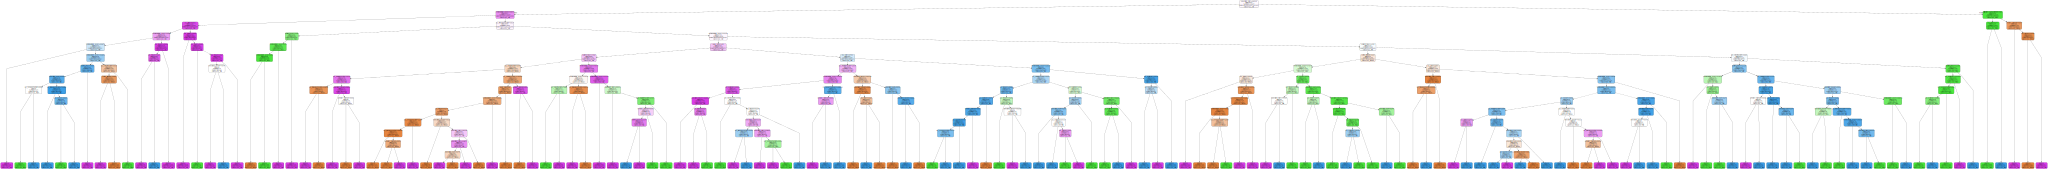

In [14]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=['Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std', 'Z1_skew',
       'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur','Temperature_avg', 'Current_avg',
       'Current_max', 'Product', 'Production', 'Active_time(H)',
       'Utilization_capacity(T/H)', 'Hole_size', 'Cutters', 'Clean_mould',
       'work_stat'],
                     class_names=['Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std', 'Z1_skew',
       'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur','Temperature_avg', 'Current_avg',
       'Current_max', 'Product', 'Production', 'Active_time(H)',
       'Utilization_capacity(T/H)', 'Hole_size', 'Cutters', 'Clean_mould',
       'work_stat'],
                     filled=True, rounded=True, leaves_parallel=True)

graph = graphviz.Source(dot_data)
graph

In [15]:
Draw_tree = tree.export_graphviz(clf,out_file=None)
graph = pydotplus.graph_from_dot_data(Draw_tree)
graph.write_pdf('Decision2_test.pdf')

OSError: [Errno 22] Invalid argument: 'Decision2_test.pdf'

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [ ]:
regr = RandomForestRegressor()

In [ ]:
regr.fit(X_train,y_train)

In [ ]:
regr.score(X_test,y_test)

In [ ]:
clf_pred = clf.predict(X_test)

In [ ]:
#混沌矩陣
print(confusion_matrix(y_test,clf_pred))
#分類器數值
print(classification_report(y_test,clf_pred))